#To predict whether the person is vaccinated or not.
h1n1_vaccine is the dependent variable-classification

# here, unique id is not required --> drop that column
## h1n1_vaccine is Dependent variable
## h1n1_vaccine is in string formate so we are using classification model.
## these models are -
* logistic Reg,
* Decision Tree classifier,
* Bagging classifier,
* Adaboost classifier,
* Gradient Boost classifier,
* Random forest classifier in this project

## we also use DATA VISUALIZATION techniques like :-
* all plots

# Step 1 --> Importing basic & imp. Packages

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step 2 --> Loading DATASET

In [49]:
df=pd.read_csv('/content/drive/MyDrive/Datasets-main/h1n1_vaccine_prediction.csv')
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


# Step 3 --> Explore shape, dtypes, info, null values status, description & concept of visualization of dataset

* sath hi jo column kaam ke nahi hain unhe DROP kar dena hai

In [50]:
df.drop(['age_bracket','qualification','race','sex','income_level','marital_status','housing_status','employment','census_msa'], axis=1, inplace=True)
df

Output hidden; open in https://colab.research.google.com to view.

In [51]:
df.shape

(26707, 25)

In [52]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
no_of_adults                 float64
no_of_children               float64
h1n1_vaccine                   int64
dtype: object

In [53]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
no_of_adults                   249
no_of_children                 249
h1n1_vaccine                     0
dtype: int64

In [54]:
df.drop(['h1n1_worry','h1n1_awareness','antiviral_medication','contact_avoidance','avoid_touch_face','dr_recc_h1n1_vacc',
         'dr_recc_seasonal_vacc','chronic_medic_condition','cont_child_undr_6_mnths','is_health_worker','has_health_insur','is_h1n1_vacc_effective',
         'is_h1n1_risky','sick_from_h1n1_vacc','is_seas_vacc_effective','is_seas_risky','sick_from_seas_vacc','no_of_adults','no_of_children'], axis=1, inplace=True)
df

Output hidden; open in https://colab.research.google.com to view.

In [55]:
df.isnull().sum()

unique_id                     0
bought_face_mask             19
wash_hands_frequently        42
avoid_large_gatherings       87
reduced_outside_home_cont    82
h1n1_vaccine                  0
dtype: int64

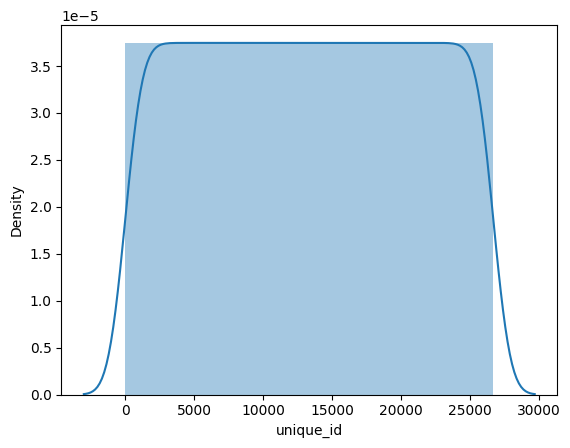

In [56]:
sns.distplot(df["unique_id"])
plt.show()

In [57]:
df.skew()

unique_id                    0.000000
bought_face_mask             3.401744
wash_hands_frequently       -1.716380
avoid_large_gatherings       0.589522
reduced_outside_home_cont    0.688227
h1n1_vaccine                 1.406022
dtype: float64

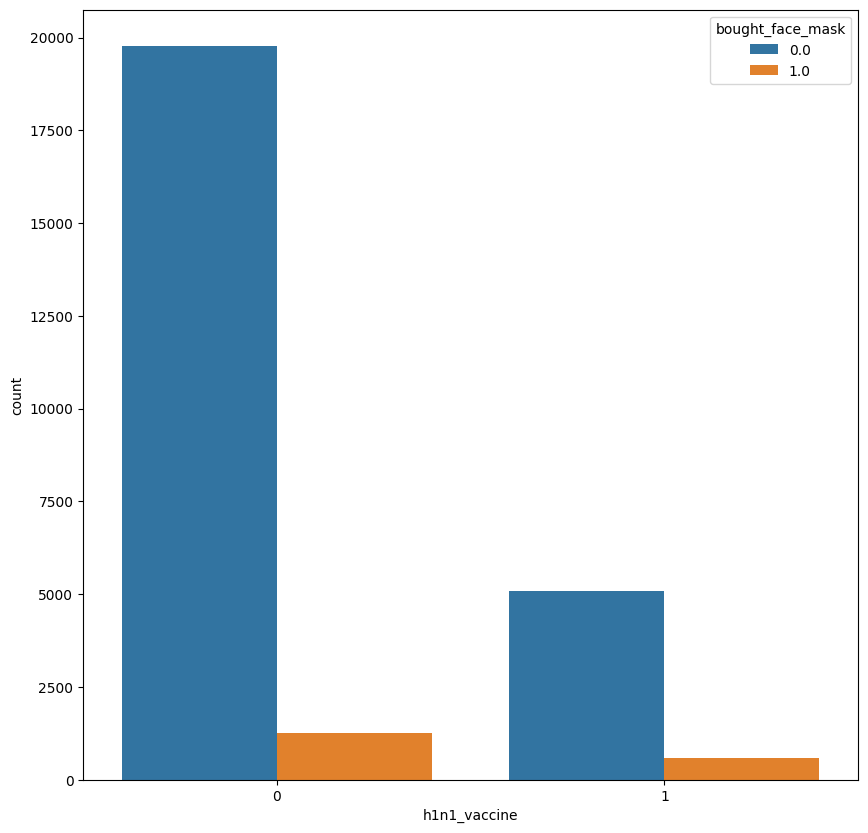

In [58]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.countplot(x='h1n1_vaccine',hue='bought_face_mask',data=df)
plt.show()

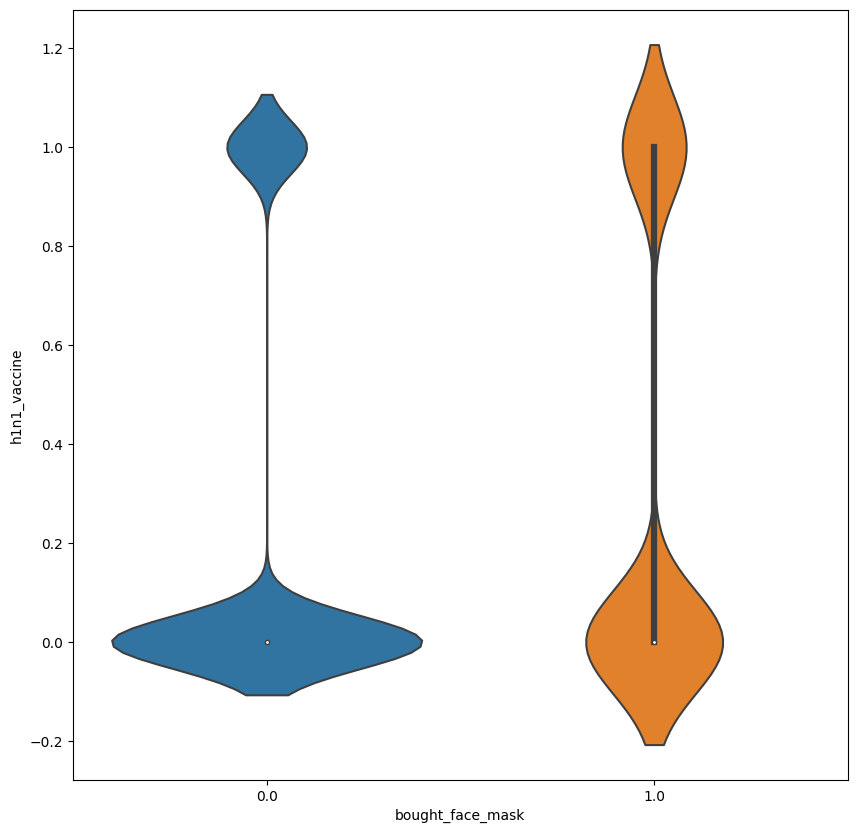

(None,)

In [59]:
plt.figure(figsize=(10,10))
sns.violinplot(y='h1n1_vaccine',x='bought_face_mask',data=df)
plt.show(),

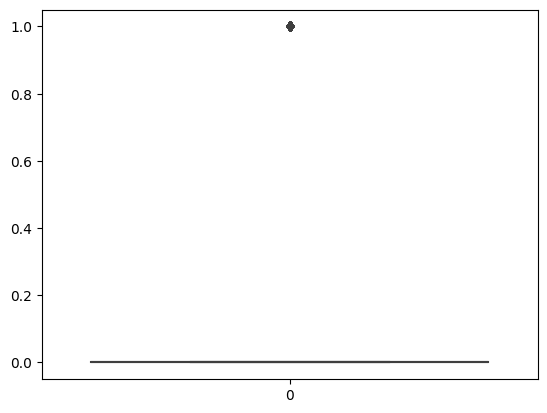

In [60]:
sns.boxplot(df['h1n1_vaccine'])
plt.show()

In [65]:
median1=df["bought_face_mask"].median()
df['bought_face_mask']=df['bought_face_mask'].fillna(median1)
median1=df["wash_hands_frequently"].median()
df['wash_hands_frequently']=df['wash_hands_frequently'].fillna(median1)
median1=df["avoid_large_gatherings"].median()
df['avoid_large_gatherings']=df['avoid_large_gatherings'].fillna(median1)
median1=df["avoid_large_gatherings"].median()
df['reduced_outside_home_cont']=df['reduced_outside_home_cont'].fillna(median1)

In [66]:
df.isnull().sum()

unique_id                    0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
h1n1_vaccine                 0
dtype: int64

In [67]:
pd.set_option('display.max_rows', None) # this will show all rows of dataset
pd.set_option('display.max_columns', None) # this will show all columns of dataset

In [68]:
df.value_counts()

Output hidden; open in https://colab.research.google.com to view.

In [77]:
y=df[['h1n1_vaccine']]
x=df.drop(['h1n1_vaccine'], axis=1)

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [79]:
from sklearn.linear_model import LogisticRegression
model_lor=LogisticRegression()

In [80]:
model_lor.fit(x_train,y_train)

LogisticRegression()

In [81]:
model_lor.score(x_train,y_train)

0.7870974644270889

In [82]:
model_lor.score(x_test, y_test)

0.7885935355048047

In [89]:
from sklearn.tree import DecisionTreeClassifier
model_dtc=DecisionTreeClassifier(max_depth=3)

In [90]:
model_dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [91]:
model_dtc.score(x_train,y_train)

0.7872579437252595

In [92]:
model_dtc.score(x_test,y_test)

0.7883439410957195

In [99]:
from sklearn.ensemble import BaggingClassifier
model_bgc=BaggingClassifier(n_estimators=100,base_estimator=model_dtc)

In [100]:
model_bgc.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=100)

In [101]:
model_bgc.score(x_train,y_train)

0.7870974644270889

In [102]:
model_bgc.score(x_test,y_test)

0.7885935355048047

In [104]:
from sklearn.ensemble import AdaBoostClassifier
model_abc=AdaBoostClassifier(n_estimators=100,base_estimator=model_dtc)

In [105]:
model_abc.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=100)

In [106]:
model_abc.score(x_train,y_train)

0.7996683427837808

In [107]:
model_abc.score(x_test,y_test)

0.7787345563459378

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc=GradientBoostingClassifier(n_estimators=100)

In [110]:
model_gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [111]:
model_gbc.score(x_train,y_train)

0.788006847116722

In [112]:
model_gbc.score(x_test,y_test)

0.7882191438911769

In [113]:
from sklearn.ensemble import RandomForestClassifier
model_rfc=RandomForestClassifier(n_estimators=100)

In [114]:
model_rfc.fit(x_train,y_train)

RandomForestClassifier()

In [115]:
model_rfc.score(x_train,y_train)

0.9994650690060982

In [116]:
model_rfc.score(x_test,y_test)

0.6641707225758143